# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


In [2]:
#Build 2D dataset
n_samples = 1500

noisy_circles = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)

x, y = datasets.make_blobs(n_samples = n_samples, random_state = 2019)
transformation = [[0.6 , -0.6] , [-0.4, 0.8]]
x_aniso = np.dot(x, transformation)
aniso = (x_aniso, y)

varied = datasets.make_blobs(n_samples = n_samples, cluster_std = [1.0,2.5,0.5], random_state = 2019)

In [3]:
default_base = {'n_neighbors' : 10, 'n_clusters' : 3}
dts = [ (noisy_circles, {'n_clusters':2}), (varied, {'n_neighbors':2}), (aniso, {'n_neighbors':2})]

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

 params {'n_neighbors': 10, 'n_clusters': 2}
 params {'n_neighbors': 2, 'n_clusters': 3}
 params {'n_neighbors': 2, 'n_clusters': 3}


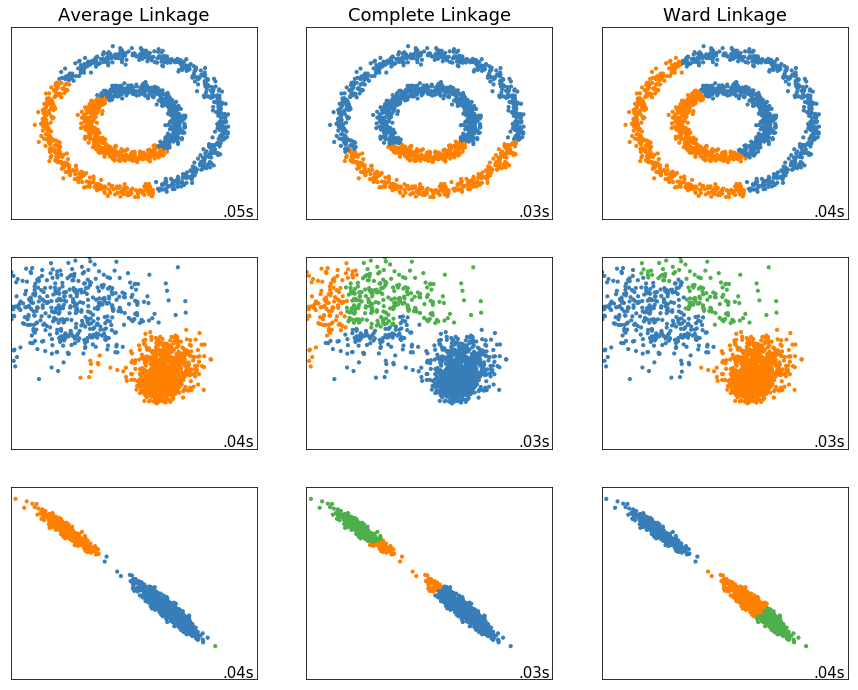

In [4]:
# 執行各種樣板資料的繪圖迴圈
plt.figure(figsize=(15,12))
plot_num = 1
for i_dataset, (dataset, alog_params) in enumerate(dts):
    params = default_base.copy()
    params.update(alog_params)
    print(f' params {params}')
    x, y = dataset
    x = StandardScaler().fit_transform(x)
    
    #Set Hierarchical clustering to 3 different parameters
    ward = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'], linkage = 'ward')
    complete = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'], linkage = 'complete')
    average = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'], linkage = 'average')
    
    clustering_alog = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward)
    )
    
    for name, alog in clustering_alog:
        # t0 / t1 : record time differences
        t0 = time.time()
        alog.fit(x)
        t1 = time.time()
        
        if hasattr(alog, 'labels_'):
            y_pred = alog.labels_.astype(int)
        else:
            y_pred = alog.predict(x)
        
        plt.subplot(len(dts), len(clustering_alog), plot_num)
        if i_dataset == 0:
            plt.title(name, size = 18)
            
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(x[:,0], x[:,1], s = 10, color = colors[y_pred])
        plt.xlim(-2.5,2.5)
        plt.ylim(-2.5,2.5)
        plt.xticks(())
        plt.yticks(())
        
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

In [5]:
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = 0.05)
blobs = datasets.make_blobs(n_samples = n_samples, random_state = 8)
no_structure = np.random.rand(n_samples, 2)

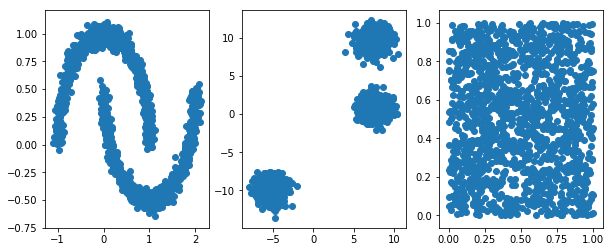

In [6]:
#Let Check 3 different datasets first

plt.figure(figsize = (10,4))

plt.subplot(1,3, 1)
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1])
plt.subplot(1,3, 2)
plt.scatter(blobs[0][:,0], blobs[0][:,1])
plt.subplot(1,3, 3)
plt.scatter(no_structure[:,0], no_structure[:,1])
plt.show()

In [7]:
default_base = { 'n_neighbors' : 10, 'n_clusters' : 3}
dts = [ (noisy_moons, {'n_clusters' : 2}), (blobs, {'n_clusters' : 3}) , (no_structure, {'n_neighbors' : 4}) ]

 0 setting parameters : {'n_neighbors': 10, 'n_clusters': 2} 
 1 setting parameters : {'n_neighbors': 10, 'n_clusters': 3} 
 2 setting parameters : {'n_neighbors': 4, 'n_clusters': 3} 


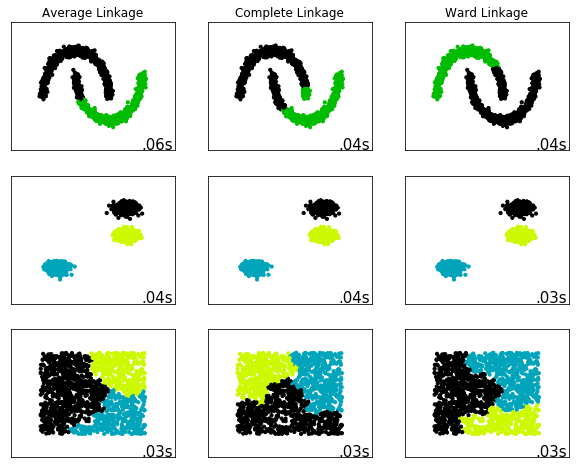

In [9]:
import matplotlib.cm as cm
plt.figure(figsize = (10,8))
plot_num = 1

for i_dataset,(dataset, alog_param) in enumerate(dts):
    
    param = default_base.copy()
    param.update(alog_param)
    
    print(f' {i_dataset} setting parameters : {param} ')
    
    if type(dataset) is tuple:
        x = dataset[0]
    else:
        x = dataset
    x = StandardScaler().fit_transform(x)
    
    ward = cluster.AgglomerativeClustering(n_clusters = param['n_clusters'], linkage = 'ward')
    complete = cluster.AgglomerativeClustering(n_clusters = param['n_clusters'], linkage = 'complete')
    average = cluster.AgglomerativeClustering(n_clusters = param['n_clusters'], linkage = 'average')
    
    clustering_alog = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward)
    )
    
    for name, alog in clustering_alog :
        plt.subplot(len(dts), len(clustering_alog), plot_num)
        if i_dataset == 0:
            plt.title(name)
        
        t0 = time.time()
        alog.fit(x)
        t1 = time.time()
        
        if hasattr(alog,'labels_'):
            pred = alog.labels_.astype(int)
        else:
            pred = alog.predict(x)
            
        colors = cm.nipy_spectral(pred.astype(float) / param['n_clusters'])
        plt.scatter(x[:,0], x[:,1], s = 10, color = colors)
        
        plt.xlim(min(x[:,0]) - 1, max(x[:,0]) +1)
        plt.ylim(min(x[:,1]) - 1, max(x[:,1]) +1)
        
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()